In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
area
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'depth'})
volumn = volumn.rename({'y' : 'gridY'})
volumn = volumn.rename({'x' : 'gridX'})
volumn

<xarray.DataArray (gridY: 898, gridX: 398, depth: 40)>
array([[[ 185243.37452372,  185244.08957647,  185245.48230844, ...,
         4988602.12148864, 4988890.54061969, 4989038.63339594],
        [ 190803.49776947,  190804.23428469,  190805.66881984, ...,
         5138336.18183385, 5138633.25793263, 5138785.79574822],
        [ 194672.17811027,  194672.92955888,  194674.39318027, ...,
         5242519.70259455, 5242822.80212832, 5242978.43275958],
        ...,
        [ 231245.03207738,  231245.92469983,  231247.66329022, ...,
         6227426.27406199, 6227786.3165811 , 6227971.18537267],
        [ 231250.84481954,  231251.73746443,  231253.47609851, ...,
         6227582.81114701, 6227942.8627164 , 6228127.73615497],
        [ 231256.65316662,  231257.54583394,  231259.28451169, ...,
         6227739.22987272, 6228099.29048557, 6228284.16856761]],

       [[ 185143.43441715,  185144.14908412,  185145.5410647 , ...,
         4985910.73547314, 4986198.99900004, 4986347.01187919],
        [ 190700.34398872,  190701.08010577,  190702.51386536, ...,
         5135558.25160667, 5135855.16709769, 5136007.62244701],
        [ 194576.87296009,  194577.62404081,  194579.08694566, ...,
         5239953.13590566, 5240256.08705178, 5240411.64149136],
...
        [ 177713.73998053,  177714.42596835,  177715.76208959, ...,
         4785829.142683  , 4786105.8383683 , 4786247.91157982],
        [ 177057.6964592 ,  177058.37991464,  177059.71110349, ...,
         4768161.89757515, 4768437.5718177 , 4768579.12055537],
        [ 176408.84861791,  176409.52956875,  176410.85587931, ...,
         4750688.43205494, 4750963.09605822, 4751104.12607462]],

       [[ 238327.01473203,  238327.93469145,  238329.72652694, ...,
         6418143.99223245, 6418515.06121492, 6418705.59169602],
        [ 238155.19081508,  238156.11011125,  238157.9006549 , ...,
         6413516.77596178, 6413887.57741887, 6414077.97053537],
        [ 237066.46303945,  237067.37813305,  237069.16049122, ...,
         6384197.3484508 , 6384566.45478697, 6384755.97752028],
        ...,
        [ 177165.58040949,  177166.26428137,  177167.59628134, ...,
         4771067.2112183 , 4771343.05343336, 4771484.68841883],
        [ 176356.6297533 ,  176357.31050258,  176358.63642053, ...,
         4749282.17858214, 4749556.761282  , 4749697.74955204],
        [ 175504.07273636,  175504.7501947 ,  175506.0697028 , ...,
         4726322.82711085, 4726596.08240155, 4726736.38909506]]])
Dimensions without coordinates: gridY, gridX, depth

In [4]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [5]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_outfall_20180101_20210930.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10','2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']
data = data.assign_coords(time = time_values)
data

<xarray.Dataset>
Dimensions:  (time: 45, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-08' '2021-09'
Data variables:
    outfall  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_outfall_20180101_20210930
    description:  Month-averaged Outfall extracted from SalishSeaCast v202111...
    history:      2023-12-06 09:38 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [6]:
total_outfall = (data['outfall'] * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum(axis = 0).sum(axis = 0)
total_outfall

<xarray.DataArray (time: 45, depth: 40)>
array([[3.25502766e-06, 3.28824461e-06, 3.37049596e-06, ...,
        1.69954920e-10, 4.64323378e-11,            nan],
       [9.56526723e-06, 9.66285666e-06, 9.72023114e-06, ...,
        7.57579485e-09, 2.21494390e-09,            nan],
       [1.64386730e-05, 1.65319754e-05, 1.65902115e-05, ...,
        3.87482914e-08, 1.36523237e-08,            nan],
       ...,
       [7.30567738e-05, 7.47531422e-05, 7.75967899e-05, ...,
        1.00220383e-04, 9.90258458e-05,            nan],
       [7.85365082e-05, 7.96441931e-05, 8.16382677e-05, ...,
        9.77819928e-05, 9.77786236e-05,            nan],
       [8.58790828e-05, 8.69150780e-05, 8.85050076e-05, ...,
        9.20304073e-05, 9.49187328e-05,            nan]])
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-08' '2021-09'

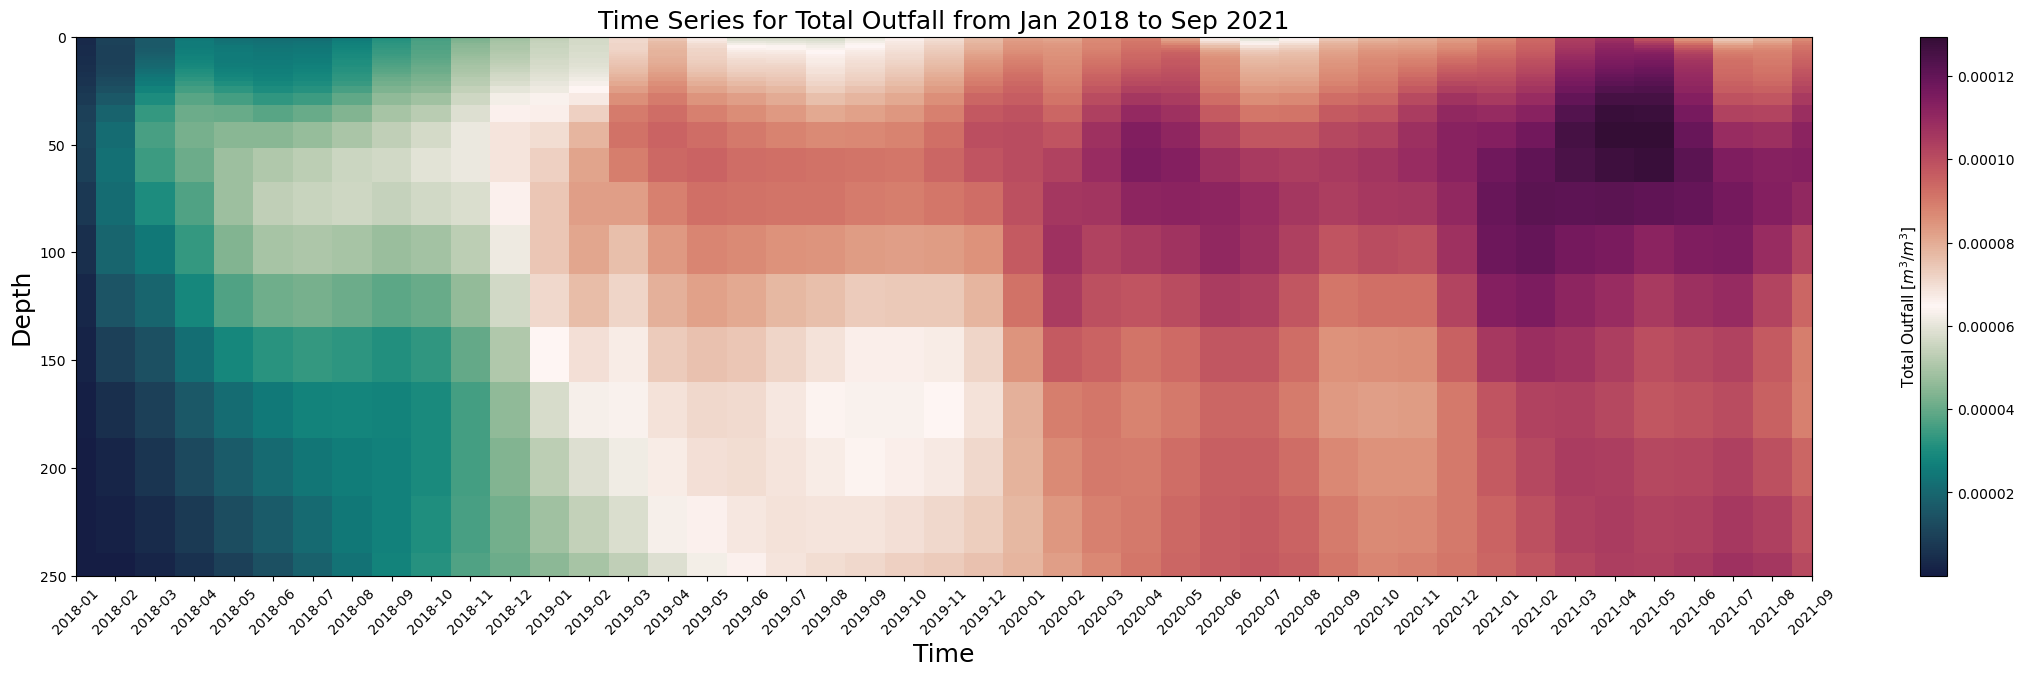

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(28, 7))
total_outfall.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Total Outfall from Jan 2018 to Sep 2021', fontsize = 18)
axs.set_xlabel('Time', fontsize = 18)
axs.set_ylabel('Depth', fontsize = 18)
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Outfall [$m^3/m^3$]'  # Replace with the desired label text
label_x = 1.05  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center', fontsize = 11)
fig.savefig('outfallTimeSeries.png', dpi=300)


In [8]:
outfall_sum = (data['outfall'] * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
outfall_sum

<xarray.DataArray (time: 45)>
array([1.07265958e+07, 3.02395233e+07, 4.80595457e+07, 6.43469250e+07,
       7.48157414e+07, 8.10845847e+07, 8.55439057e+07, 9.02904662e+07,
       9.52610515e+07, 1.02302057e+08, 1.14579764e+08, 1.31533909e+08,
       1.48469467e+08, 1.61228350e+08, 1.73838464e+08, 1.85973445e+08,
       1.87052818e+08, 1.84641078e+08, 1.82717206e+08, 1.80263900e+08,
       1.80071258e+08, 1.82551346e+08, 1.88086100e+08, 1.99035822e+08,
       2.13851109e+08, 2.23894874e+08, 2.30515649e+08, 2.36651039e+08,
       2.38430390e+08, 2.33079933e+08, 2.26721694e+08, 2.21685159e+08,
       2.18676744e+08, 2.20854711e+08, 2.24991615e+08, 2.37818433e+08,
       2.50660021e+08, 2.58555295e+08, 2.66747342e+08, 2.70229528e+08,
       2.66610422e+08, 2.58804646e+08, 2.48781281e+08, 2.42051862e+08,
       2.38097113e+08])
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-08' '2021-09'

In [8]:
outfall_sum.isel(time = 35)

<xarray.DataArray ()>
array(2.37818433e+08)
Coordinates:
    time     <U7 '2020-12'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

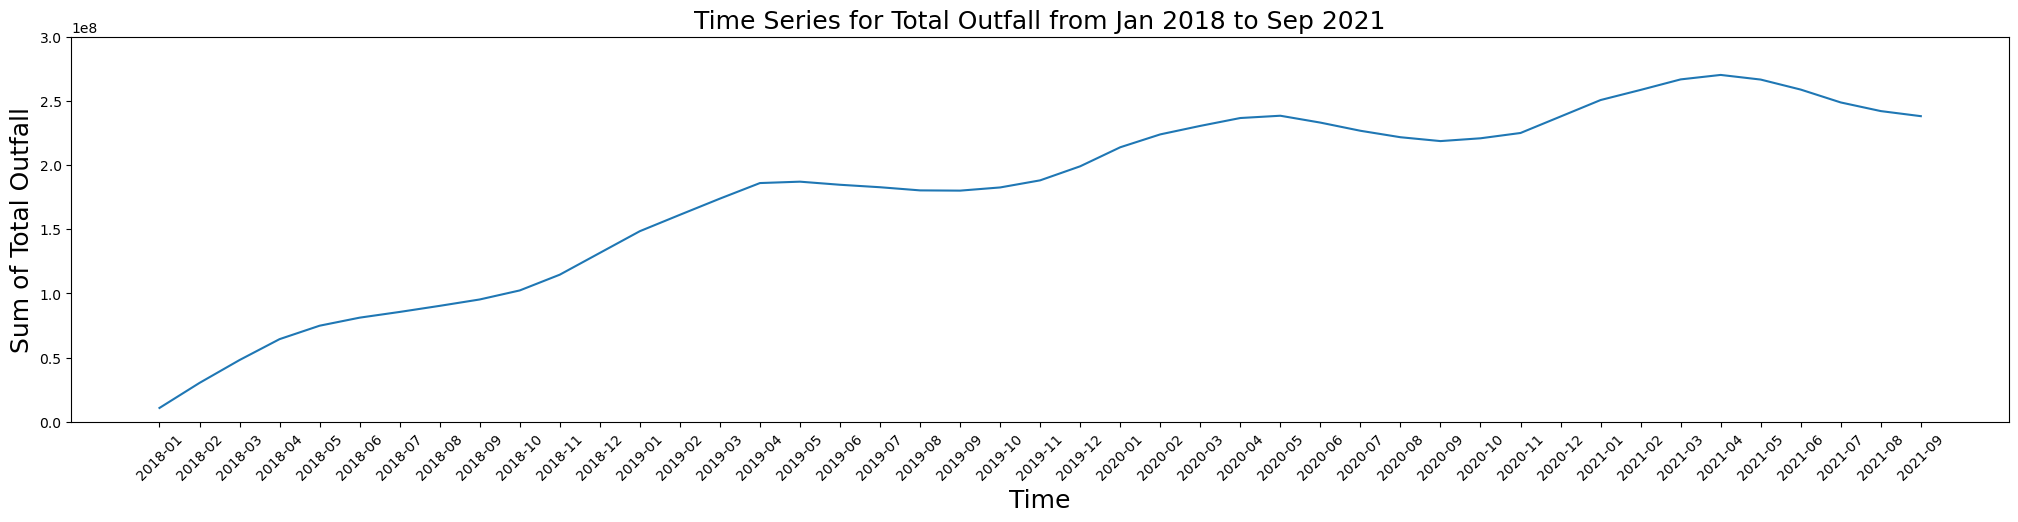

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
outfall_sum.plot(ax=axs)
axs.set_title(f'Time Series for Total Outfall from Jan 2018 to Sep 2021', fontsize= 18)
axs.set_xlabel('Time', fontsize = 18)
axs.set_ylabel('Sum of Total Outfall', fontsize = 18)
axs.set_ylim([0, 3e8])
plt.setp(axs.get_xticklabels(), rotation=45)

In [10]:
Jan_2018 = outfall_sum.isel(time = 0)
Dec_2018 = outfall_sum.isel(time = 11)
Dec_2019 = outfall_sum.isel(time = 23)

In [11]:
Dec_2019

<xarray.DataArray ()>
array(1.99035822e+08)
Coordinates:
    time     <U7 '2019-12'

In [12]:
import numpy as np
from scipy.optimize import curve_fit
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define the exponential function
def exp_function(x, a, T):
    t0 = datetime(2018, 1, 1)
    t0_days = (t0 - t0).days
    return a * (1 - np.exp(-(x - t0_days) / T))

# Convert dates to numerical format (days since Jan 1, 2018)
def date_to_days(date_str):
    date_obj = datetime.strptime(date_str, '%B %d, %Y')
    t0 = datetime(2018, 1, 1)
    return (date_obj - t0).days

# Function to convert numerical days back to date format
def days_to_date(days):
    t0 = datetime(2018, 1, 1)
    return t0 + timedelta(days=int(days))

# Data points (x values are converted to days)
x_data = np.array([date_to_days("January 1, 2018"), 
                   date_to_days("December 15, 2018"), 
                   date_to_days("December 15, 2019")])
y_data = np.array([0, 1.31533909e+08, 1.99035822e+08])

# Perform the exponential fit
params, covariance = curve_fit(exp_function, x_data, y_data, p0=[1e+08, 365])  # Initial guess for a and T

# Extracting the parameters a and T
a, T = params

# Generate x values for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = exp_function(x_fit, a, T)

# Convert fitted x values and original x data to dates for plotting
x_fit_dates = np.array([days_to_date(day) for day in x_fit])
x_data_dates = np.array([days_to_date(day) for day in x_data])

# Print the parameters a and T
print("a =", a)
print("T =", T)


a = 261351229.74028072
T = 497.3297299537306


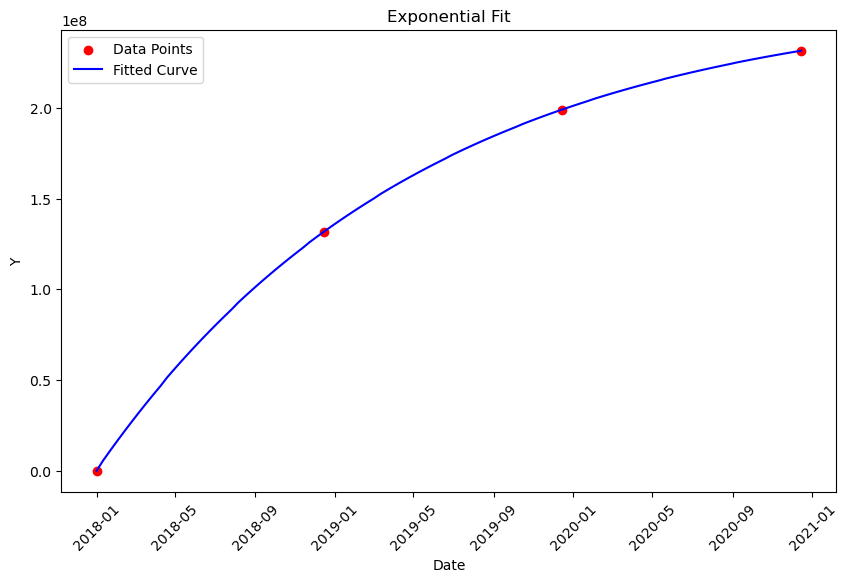

In [13]:
x_data = np.array([date_to_days("January 1, 2018"), 
                   date_to_days("December 15, 2018"), 
                   date_to_days("December 15, 2019"),
                   date_to_days("December 15, 2020")])
y_data = np.array([0, 1.31533909e+08, 1.99035822e+08, 231498435.48399398])

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = exp_function(x_fit, a, T)

x_dates = np.array([days_to_date(day) for day in x_data])
x_fit_dates = np.array([days_to_date(day) for day in x_fit])


plt.figure(figsize=(10, 6))
plt.scatter(x_dates, y_data, label='Data Points', color='red')  # Plot the original data points as dates
plt.plot(x_fit_dates, y_fit, label='Fitted Curve', color='blue')      # Plot the fitted curve with dates on x-axis
plt.xlabel('Date')
plt.ylabel('Y')
plt.title('Exponential Fit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [14]:
predict_date = "December 15, 2020"
predict_days = date_to_days(predict_date)
predicted_y = exp_function(predict_days, a, T)
predicted_y

231498435.48399398